In [1]:
import csv
import json
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt



/tmp/ipykernel_402146/1174568883.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:


df = pd.read_excel("2022.xlsx")

#print(df)

In [3]:
selected_df = df[['sourceUUID', 'eventCategory','description']].set_index('sourceUUID')
selected_df

,eventCategory,description
sourceUUID,,
062467ce-b90d-4f64-8aac-6588a448ba34,General,Connection established: Socket[addr=/127.0.0.1...
f78db54c-f95e-4dcd-8369-a3d00f235886,PerfData,"{""PerfData"": [{""P.CPU.USR"": 2.6, ""resource"": ""..."
13d4f733-800c-487e-ac4c-3827d8a6109c,General,Received UMF Message : f78db54c-f95e-4dcd-8369...
82866ad5-6854-4896-8328-1772714c61e9,General,"Alarm received with [type: technical, techAlar..."
82866ad5-6854-4896-8328-1772714c61e9,General,"Alarm banner displays [type: technical, techAl..."
...,...,...
062467ce-b90d-4f64-8aac-6588a448ba34,General,Connection established: Socket[addr=/127.0.0.1...
e215c277-19b3-4f14-9182-931e8bbcbb0e,PerfData,"{""PerfData"": [{""B.STATE.CHRG"": 100, ""resource""..."
e215c277-19b3-4f14-9182-931e8bbcbb0e,PerfData,"{""PerfData"": [{""N.IO.PRCV.T"": 192343, ""resourc..."


In [4]:
perfData = selected_df[selected_df['eventCategory'] == 'PerfData' ]
perfData

,eventCategory,description
sourceUUID,,
f78db54c-f95e-4dcd-8369-a3d00f235886,PerfData,"{""PerfData"": [{""P.CPU.USR"": 2.6, ""resource"": ""..."
82866ad5-6854-4896-8328-1772714c61e9,PerfData,"{""PerfData"":[{""timestamp"":""2022-09-14T20:00:03..."
47c1ad91-8d88-4956-9e49-7893b4bc3074,PerfData,"{""PerfData"": [{""B.STATE.CHRG"": 100, ""resource""..."
47c1ad91-8d88-4956-9e49-7893b4bc3074,PerfData,"{""PerfData"": [{""B.STATE.ETMP"": 29, ""resource"":..."
47c1ad91-8d88-4956-9e49-7893b4bc3074,PerfData,"{""PerfData"": []}"
...,...,...
f78db54c-f95e-4dcd-8369-a3d00f235886,PerfData,"{""PerfData"": [{""P.CPU.USR"": 2.05, ""resource"": ..."
e215c277-19b3-4f14-9182-931e8bbcbb0e,PerfData,"{""PerfData"": [{""B.STATE.CHRG"": 100, ""resource""..."
e215c277-19b3-4f14-9182-931e8bbcbb0e,PerfData,"{""PerfData"": [{""N.IO.PRCV.T"": 192343, ""resourc..."


In [5]:
#find voltage for battery
dic_v = {}
for index, row in perfData.iterrows():

    #print(index)
    description = row['description']
    #print(description)
    #print(index)
    if description != None:
        json_convert = pd.read_json(StringIO(description))
        voltage_list = []
        for data in json_convert['PerfData']:
    
            #print(data)
            if 'B.STATE.V' in data:
                voltage_list.append(data)

        if len(voltage_list) != 0:
            if index in dic_v:
                temp = dic_v[index]
                combine = temp + voltage_list
                dic_v[index] = combine
            else:
                dic_v[index] = voltage_list

for v in dic_v:
    print(v)

f78db54c-f95e-4dcd-8369-a3d00f235886
47c1ad91-8d88-4956-9e49-7893b4bc3074
e215c277-19b3-4f14-9182-931e8bbcbb0e
89b1acae-9112-4a14-bcbd-acde9754db96


In [6]:
battery_f87 = dic_v["f78db54c-f95e-4dcd-8369-a3d00f235886"]
type(battery_f87)
#for b in battery_f87:
   # print(b)
    
df_f87 = pd.DataFrame(battery_f87)
df_f87
#battery_f87

,B.STATE.V,resource,timestamp
0,4058,battery:HUB,2022-09-14T19:59:53.000-0400
1,4058,battery:HUB,2022-09-14T19:59:54.000-0400
2,4058,battery:HUB,2022-09-14T19:59:57.000-0400
3,4058,battery:HUB,2022-09-14T19:59:58.000-0400
4,4058,battery:HUB,2022-09-14T19:59:59.000-0400
...,...,...,...
1526,4057,battery:HUB,2022-09-14T20:59:38.000-0400
1527,4057,battery:HUB,2022-09-14T20:59:39.000-0400
1528,4057,battery:HUB,2022-09-14T20:59:48.000-0400
1529,4057,battery:HUB,2022-09-14T20:59:49.000-0400


In [7]:
#type(df_f87.iloc[0,2])
df_f87['timestamp'] = pd.to_datetime(df_f87['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%z')
#df_f87

hub_df_f87 = df_f87[df_f87['resource'] == 'battery:HUB' ]
hub_df_f87

,B.STATE.V,resource,timestamp
0,4058,battery:HUB,2022-09-14 19:59:53-04:00
1,4058,battery:HUB,2022-09-14 19:59:54-04:00
2,4058,battery:HUB,2022-09-14 19:59:57-04:00
3,4058,battery:HUB,2022-09-14 19:59:58-04:00
4,4058,battery:HUB,2022-09-14 19:59:59-04:00
...,...,...,...
1526,4057,battery:HUB,2022-09-14 20:59:38-04:00
1527,4057,battery:HUB,2022-09-14 20:59:39-04:00
1528,4057,battery:HUB,2022-09-14 20:59:48-04:00
1529,4057,battery:HUB,2022-09-14 20:59:49-04:00


In [8]:
# voltage that > 3200
(hub_df_f87['B.STATE.V'] > 3200).sum()

1413

In [9]:
# voltage that <2850 or >4250 (bad)
((hub_df_f87['B.STATE.V'] < 2850 ) & (hub_df_f87['B.STATE.V']  > 4250)).sum()

0

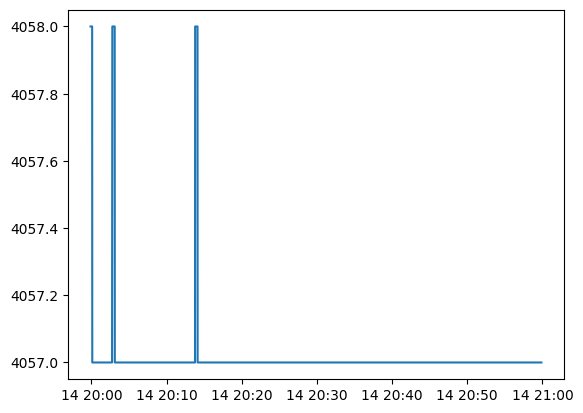

In [10]:
plt.plot(hub_df_f87['timestamp'], hub_df_f87['B.STATE.V'])


f78db54c-f95e-4dcd-8369-a3d00f235886
47c1ad91-8d88-4956-9e49-7893b4bc3074
e215c277-19b3-4f14-9182-931e8bbcbb0e
89b1acae-9112-4a14-bcbd-acde9754db96


{'f78db54c-f95e-4dcd-8369-a3d00f235886': [1413,
  0,
 '47c1ad91-8d88-4956-9e49-7893b4bc3074': [1144,
  0,
 'e215c277-19b3-4f14-9182-931e8bbcbb0e': [1306,
  0,
 '89b1acae-9112-4a14-bcbd-acde9754db96': [28,
  0,
  [<matplotlib.lines.Line2D at 0x7fbd37cce6b0>]]}

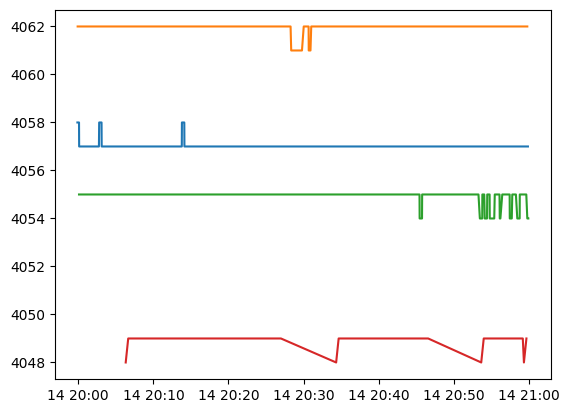

In [12]:
result = {}
for b in dic_v:

    print(b)
    battery = dic_v[b]
    df_b = pd.DataFrame(battery)
    df_b['timestamp'] = pd.to_datetime(df_b['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%z')
    hub_df_b = df_b[df_b['resource'] == 'battery:HUB' ]
    r = []
    r.append(str((hub_df_b['B.STATE.V'] > 3200).sum())+ "/" + str( hub_df_b['B.STATE.V'].sum()))
    r.append(((hub_df_b['B.STATE.V'] < 2850 ) & (hub_df_b['B.STATE.V']  > 4250)).sum())
    plot = plt.plot(hub_df_b['timestamp'], hub_df_b['B.STATE.V'])
    r.append(plot)

    result[b] = r

result

{'f78db54c-f95e-4dcd-8369-a3d00f235886': ['59/226465',
  0,
 '47c1ad91-8d88-4956-9e49-7893b4bc3074': ['0/0',
  0,
 'e215c277-19b3-4f14-9182-931e8bbcbb0e': ['0/0',
  0,
 '89b1acae-9112-4a14-bcbd-acde9754db96': ['0/0',
  0,
  [<matplotlib.lines.Line2D at 0x7fbd377766b0>]]}

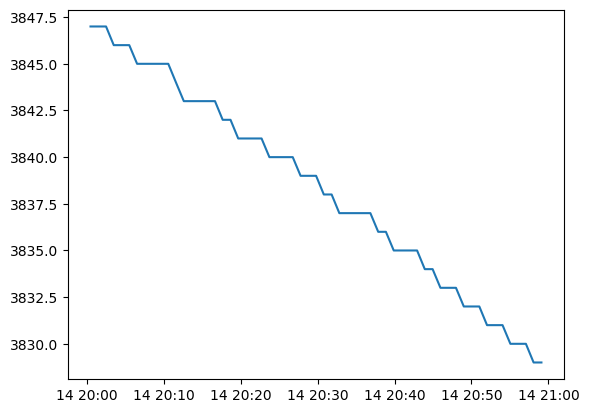

In [23]:
#SPO2SENSOR
result = {}
for b in dic_v:

    #print(b)
    battery = dic_v[b]
    df_b = pd.DataFrame(battery)
    df_b['timestamp'] = pd.to_datetime(df_b['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%z')
    hub_df_b = df_b[df_b['resource'] == 'battery:SPO2SENSOR' ]
    r = []
    r.append(str((hub_df_b['B.STATE.V'] > 3200).sum())+ "/" + str( hub_df_b['B.STATE.V'].sum()))
    r.append(((hub_df_b['B.STATE.V'] < 2850 ) & (hub_df_b['B.STATE.V']  > 4250)).sum())
    plot = plt.plot(hub_df_b['timestamp'], hub_df_b['B.STATE.V'])
    r.append(plot)

    result[b] = r
    

result

{'f78db54c-f95e-4dcd-8369-a3d00f235886': ['59/226527',
  0,
 '47c1ad91-8d88-4956-9e49-7893b4bc3074': ['0/0',
  0,
 'e215c277-19b3-4f14-9182-931e8bbcbb0e': ['0/0',
  0,
 '89b1acae-9112-4a14-bcbd-acde9754db96': ['0/0',
  0,
  [<matplotlib.lines.Line2D at 0x7fbd37708940>]]}

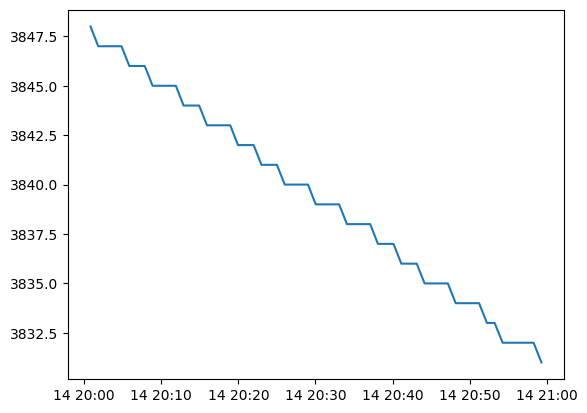

In [22]:
#resp
result = {}
for b in dic_v:

    #print(b)
    battery = dic_v[b]
    df_b = pd.DataFrame(battery)
    df_b['timestamp'] = pd.to_datetime(df_b['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%z')
    hub_df_b = df_b[df_b['resource'] == 'battery:RESPSENSOR' ]
    r = []
    r.append(str((hub_df_b['B.STATE.V'] > 3200).sum())+ "/" + str( hub_df_b['B.STATE.V'].sum()))
    r.append(((hub_df_b['B.STATE.V'] < 2850 ) & (hub_df_b['B.STATE.V']  > 4250)).sum())
    plot = plt.plot(hub_df_b['timestamp'], hub_df_b['B.STATE.V'])
    r.append(plot)

    result[b] = r
    

result